# Data Analysis in Pandas for Beginners

## Topics Covered:

1. Introducing Python Libraries
2. Accessing Data within Pandas
3. Importing Data Using Pandas
4. Understanding Pandas Series and DataFrames
5. Statistical Methods in Pandas
6. Data Visualization with Pandas
7. Practice Exercises

---

## 1. Introducing Python Libraries

When starting data science in Python, several libraries become your everyday tools. Here's a friendly comparison to a real-life toolbox:

- **NumPy**: Your scientific calculator - used for fast numerical operations
- **SciPy**: The lab assistant - handles advanced mathematical functions
- **Statsmodels**: The statistician - great for hypothesis testing and modeling
- **Pandas**: The spreadsheet master - ideal for structured data analysis
- **Matplotlib**: The artist - helps visualize data
- **Seaborn**: The decorator - builds beautiful visualizations on top of Matplotlib
- **Scikit-Learn**: The machine learning guru - handles training and testing models
- **TensorFlow/Keras**: The deep thinker - used for building neural networks

Today, we focus on **Pandas** - the data wrangler.

---

## 2. Accessing Data within Pandas

Let's say you've just received a dataset - it’s your new pet. Pandas lets you ask questions like:

- What are the column names?
- How many rows are there?
- What's inside a specific row or column?

### Example:

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./data/data.csv")
print(df.head())

   OrderID         day  sales
0     1001      Monday     10
1     1003     Tuesday     15
2     1004   Wednesday      7
3     1005    Thursday     20
4     1007      Friday     13


**Line-by-line:**

- `import pandas as pd`: Loads the Pandas library.
- `pd.read_csv(...)`: Reads the CSV into a DataFrame.
- `df.head()`: Shows the first 5 rows.

Other useful ways to access data:

In [3]:
print(df.columns)        # Shows all column names
print(df["sales"])       # Accesses a specific column
print(df.iloc[0])        # Accesses the first row

Index(['OrderID', 'day', 'sales'], dtype='object')
0    10
1    15
2     7
3    20
4    13
Name: sales, dtype: int64
OrderID      1001
day        Monday
sales          10
Name: 0, dtype: object


---

## 3. Importing Data Using Pandas

Pandas makes it easy to import data from various formats:

### CSV File:

In [4]:
df = pd.read_csv("./data/data.csv")

### Excel File:

In [5]:
df = pd.read_excel("./data/data.xlsx")

### JSON File:

In [6]:
df = pd.read_json("./data/data.json")

You can also import from URLs or APIs - like grabbing data directly from the internet!

---

## 4. Understanding Pandas Series and DataFrames

> Think of a Series as a single column in a spreadsheet, and a DataFrame as the entire table.

### Series:

In [7]:
s = pd.Series([10, 20, 30])
print(s)

0    10
1    20
2    30
dtype: int64


### DataFrame:

In [8]:
data = {
    "day": ["Mon", "Tue", "Wed"],
    "sales": [100, 120, 90]
}
df = pd.DataFrame(data)
print(df)

   day  sales
0  Mon    100
1  Tue    120
2  Wed     90


**Line-by-line:**

- We create a dictionary with two lists.
- `pd.DataFrame(data)` turns that dictionary into a DataFrame.

---

## 5. Statistical Methods in Pandas

Pandas comes with many statistical tools built in:

### Descriptive Statistics:

In [9]:
# Descriptive statistics and useful DataFrame methods
print("Stats", df.describe())      # Summary stats
print("\n")
print("Info")
df.info()                          # DataFrame info (non-null counts, dtypes)
print("\n")
print("Mean", df["sales"].mean()) # Average (Can also use .mode & .median)
print("\n")
print("Std", df["sales"].std())  # Standard deviation
print("\nCount", df["sales"].count()) # Count of non-null values
print("\nVar", df["sales"].var())     # Variance
print("\nSum", df["sales"].sum())     # Sum of values
print("\nCumulative Sum", df["sales"].cumsum()) # Cumulative sum

# Using apply() to transform a column (e.g., add 10 to each sales value)
print("\nApply: Add 10 to each sales value")
print(df["sales"].apply(lambda x: x + 10))

# Using applymap() to transform all elements (e.g., convert all to string)
print("\nApplymap: Convert all elements to string")
print(df.applymap(str))

print("\nRows")
print("\nFirst 5")
print(df["sales"].head())  # First five rows
print("\nLast 5")
print(df["sales"].tail())  # Last five rows

Stats             sales
count    3.000000
mean   103.333333
std     15.275252
min     90.000000
25%     95.000000
50%    100.000000
75%    110.000000
max    120.000000


Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   day     3 non-null      object
 1   sales   3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 180.0+ bytes


Mean 103.33333333333333


Std 15.275252316519467

Count 3

Var 233.33333333333334

Sum 310

Cumulative Sum 0    100
1    220
2    310
Name: sales, dtype: int64

Apply: Add 10 to each sales value
0    110
1    130
2    100
Name: sales, dtype: int64

Applymap: Convert all elements to string
   day sales
0  Mon   100
1  Tue   120
2  Wed    90

Rows

First 5
0    100
1    120
2     90
Name: sales, dtype: int64

Last 5
0    100
1    120
2     90
Name: sales, dtype: int64


In [10]:
values = [100, 120, 90]
mean = sum(values) / len(values)
print(mean)

103.33333333333333


### Correlation:

In [11]:
sales_df = pd.read_csv("./data/sales_data.csv")
df_numeric = sales_df.select_dtypes(include=['number'])
print(df_numeric.corr())

           OrderID     Sales  Quantity
OrderID   1.000000 -0.105764 -0.043644
Sales    -0.105764  1.000000 -0.415686
Quantity -0.043644 -0.415686  1.000000


Finds how strongly numeric columns relate to each other (ranges between -1 and 1).


## Working with DataFrames: Access, Filter, Sort, Modify, and Export (WineQT.csv Example)
This section demonstrates common DataFrame operations using the WineQT.csv dataset:
- Accessing a single column
- Accessing data with `.loc[]` and `.iloc[]`
- Filtering data
- Sorting data
- Adding and modifying data
- Exporting data

In [12]:
# Load the WineQT.csv dataset
wine_df = pd.read_csv("./data/WineQT.csv")

# Accessing a single column
print(wine_df["alcohol"])  # Access the 'alcohol' column

# Accessing data with .loc[] (label-based) and .iloc[] (position-based)
print(wine_df.loc[0, "alcohol"])   # First row, 'alcohol' column
print(wine_df.iloc[0, 0])            # First row, first column

# Filtering data: wines with alcohol > 12
high_alcohol = wine_df[wine_df["alcohol"] > 12]
print(high_alcohol.head())

# Sorting data by pH (ascending)
sorted_wine = wine_df.sort_values(by="pH")
print(sorted_wine.head())

# Adding a new column: 'high_quality' (quality >= 7)
wine_df["high_quality"] = wine_df["quality"] >= 7
print(wine_df[["quality", "high_quality"]].head())

# Modifying data: set all 'high_quality' False if alcohol < 10
wine_df.loc[wine_df["alcohol"] < 10, "high_quality"] = False
print(wine_df[["alcohol", "high_quality"]].head())

# Exporting data to a new CSV file
wine_df.to_csv("./data/wineqt_modified.csv", index=False)

0        9.4
1        9.8
2        9.8
3        9.8
4        9.4
        ... 
1138    11.0
1139     9.5
1140    10.5
1141    11.2
1142    10.2
Name: alcohol, Length: 1143, dtype: float64
9.4
7.4
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
32             4.6              0.52         0.15             2.1      0.054   
91             5.6              0.50         0.09             2.3      0.049   
96             5.2              0.34         0.00             1.8      0.050   
98             5.2              0.34         0.00             1.8      0.050   
148            9.7              0.53         0.60             2.0      0.039   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
32                   8.0                  65.0  0.99340  3.90       0.56   
91                  17.0                  99.0  0.99370  3.63       0.63   
96                  27.0                  63.0  0.99160  3.68       0.79   
98                  

---

## 6. Data Visualization with Pandas

Pandas integrates easily with Matplotlib to produce quick visualizations. It helps make sense of patterns and trends in the data.

### Line Plot:

<Axes: title={'center': 'Daily Sales'}, xlabel='day'>

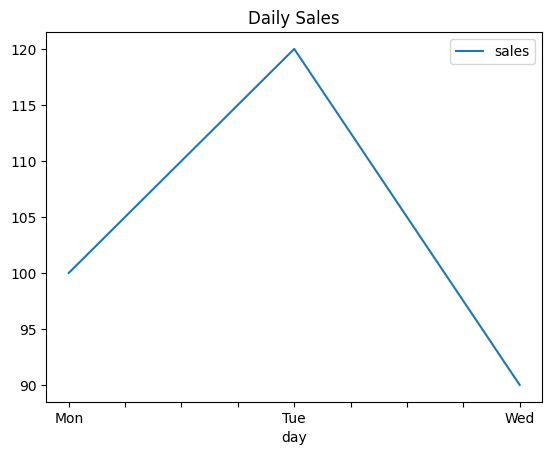

In [13]:
df.plot(x="day", y="sales", kind="line", title="Daily Sales")

### Bar Plot:

<Axes: title={'center': 'Bar Plot of Sales'}, xlabel='day'>

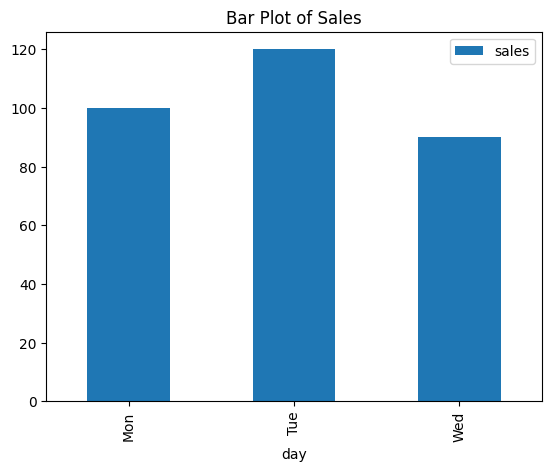

In [14]:
df.plot(x="day", y="sales", kind="bar", title="Bar Plot of Sales")

### Histogram:

<Axes: title={'center': 'Sales Distribution'}, ylabel='Frequency'>

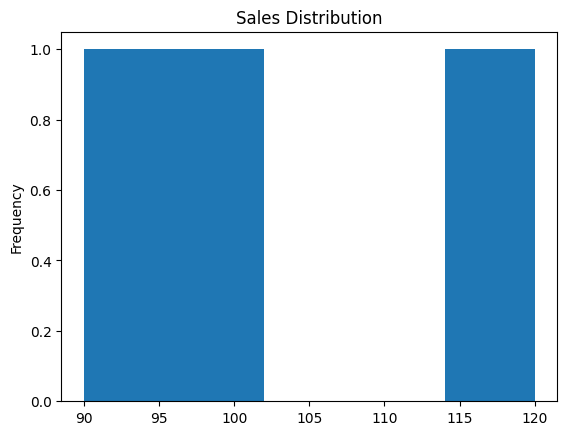

In [15]:
df["sales"].plot(kind="hist", bins=5, title="Sales Distribution")

### Pie Chart:

<Axes: title={'center': 'Sales Share by Day'}, ylabel='sales'>

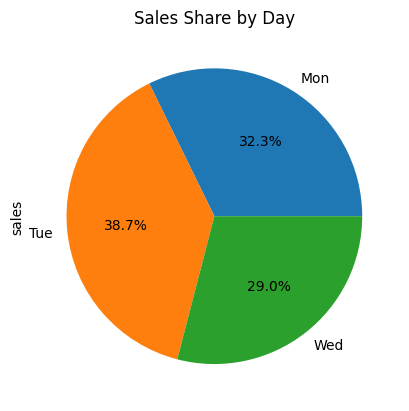

In [16]:
df.set_index("day")["sales"].plot(kind="pie", autopct="%1.1f%%", title="Sales Share by Day")

**Line-by-line:**

- `df.plot(...)`: Triggers the visualization.
- `kind`: Specifies the chart type.
- `x` and `y`: Identify axes.
- `title`: Adds a title to the plot.

Make sure to include `import matplotlib.pyplot as plt` and run `plt.show()` if you're not using an environment that auto-displays plots.

---

## Practice Exercises

1. Load the sample `data.csv` into a Pandas DataFrame.
2. Print the column names and the first 10 rows.
3. Create a new column that contains 10% tax on the sales.
4. Calculate the average and standard deviation of the sales column.
5. Try making a DataFrame from a dictionary manually.
6. Use Pandas to create a line plot and bar chart from the data.

---

## Summary

- Pandas is central to data analysis in Python.
- You can quickly access, manipulate, and summarize data.
- DataFrames and Series are the basic building blocks.
- Pandas includes statistical tools for quick insights.
- You can visualize your data directly using built-in plotting features.

Next steps: We'll explore advanced data manipulation and grouping in Pandas, and integrate those insights with Seaborn for rich visual storytelling.

[Slides](https://docs.google.com/presentation/d/1W39QO-6y_y5W73n17HfY3AFU8NUNJLtkO532qgCp5hI/edit?usp=sharing)